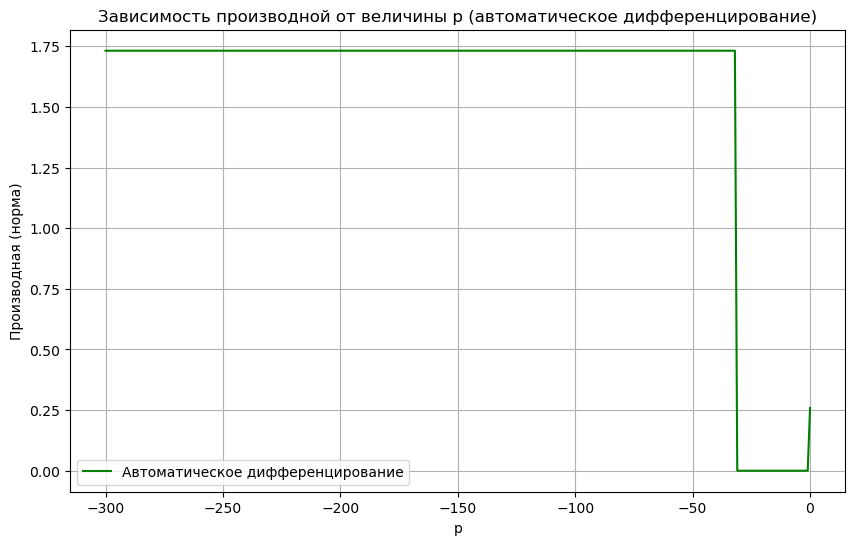

Наследственная погрешность значения функции f: 0.001732


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from autograd import jacobian
import autograd.numpy as anp


def f(x):
    norm_x2 = anp.dot(x, x)
    return anp.exp(-norm_x2) * x

n = 3 
x0 = np.zeros(n) 

p_values = np.arange(-300, 1, 1)
alpha_values = 10 ** (-p_values) 

jacobian_f = jacobian(f)

auto_diff_derivatives = []
for alpha in alpha_values:
    perturbed_x = x0 + alpha
    jacobian_value = jacobian_f(perturbed_x)
    derivative_norm = np.linalg.norm(jacobian_value)
    auto_diff_derivatives.append(derivative_norm)

auto_diff_derivatives = np.array(auto_diff_derivatives)

plt.figure(figsize=(10, 6))
plt.plot(p_values, auto_diff_derivatives, label="Автоматическое дифференцирование", color="green")
plt.xlabel("p")
plt.ylabel("Производная (норма)")
plt.title("Зависимость производной от величины p (автоматическое дифференцирование)")
plt.legend()
plt.grid()
plt.show()

delta_x = 0.001 * np.ones(n)
jacobian_at_x0 = jacobian_f(x0)

delta_f = np.linalg.norm(jacobian_at_x0 @ delta_x)
print(f"Наследственная погрешность значения функции f: {delta_f:.6f}")
